# Exploración de Datos Multivariados
## Tecnicatura Universitaria en Procesamiento y Explotación de Datos - Facultad de Ingeniería (UNER)
### Carrozzo, Felipe - Ré, Lautaro

## Parte 2

---

### Importo librerías utilizadas

In [213]:
library(readxl)
library(ggplot2)
library(dplyr)
library(pwr)
library(lsr)
library(stringr)
# library(rstatix)
# library(dmwr2)
library(scatterplot3d)
# library(ggally)
library(devtools)
library(aplpack)
# library(hotelling)
library(heplots)
library(psych)
library(factoextra)

### Importo los datasets utilizados y ya procesados de la Parte 1 del Trabajo

In [214]:
# Datasets Principales
Primaria3 <- read_excel("D:/College/Tecnicatura en Procesamiento y Explotación de Datos/2do Año/1er Cuatrimestre/Exploración de Datos Multivariados/TP2/Datasets/Primaria3.xlsx")
Secundaria3 <- read_excel("D:/College/Tecnicatura en Procesamiento y Explotación de Datos/2do Año/1er Cuatrimestre/Exploración de Datos Multivariados/TP2/Datasets/Secundaria3.xlsx")


# Datasets Gualeguay
GUALEGUAY_original <- read_excel("D:/College/Tecnicatura en Procesamiento y Explotación de Datos/2do Año/1er Cuatrimestre/Exploración de Datos Multivariados/TP2/Datasets/GUALEGUAY_TP2.xlsx")
GUALEGUAY_primaria <- read_excel("D:/College/Tecnicatura en Procesamiento y Explotación de Datos/2do Año/1er Cuatrimestre/Exploración de Datos Multivariados/TP2/Datasets/GUALEGUAYprimaria_TP2.xlsx")
GUALEGUAY_secundaria <- read_excel("D:/College/Tecnicatura en Procesamiento y Explotación de Datos/2do Año/1er Cuatrimestre/Exploración de Datos Multivariados/TP2/Datasets/GUALEGUAYsecundaria_TP2.xlsx")

In [215]:
# Visualización de "Secundaria3"
names(Secundaria3)
dim(Secundaria3)
head(Secundaria3, 2)

[1] "Cue_Anexo"           "Nivel"               "Modalidad_Educ_Gral"
 [4] "Cue"                 "Estado"              "Sector"             
 [7] "Departamento"        "NINA"                "Cant_Secciones"     
[10] "Tipo_titulo"         "Primero"             "Segundo"            
[13] "Tercero"             "Cuarto"              "Quinto"             
[16] "Sexto"               "Septimo"             "Mat_ciclo_basico"   
[19] "Mat_ciclo_orientado" "Matricula_Total"     "Titulo"

[1] 572  21

Cue_Anexo,Nivel,Modalidad_Educ_Gral,Cue,Estado,Sector,Departamento,NINA,Cant_Secciones,Tipo_titulo,...,Segundo,Tercero,Cuarto,Quinto,Sexto,Septimo,Mat_ciclo_basico,Mat_ciclo_orientado,Matricula_Total,Titulo
600003600,Secundaria,Común,6000036,Activo,ESTATAL,NA,no,18,Ciclo básico/ educación secundaria básica,...,79,73,65,54,61,0,219,180,399,Bachiller en ciencias sociales y humanidades; Bachiller en economía y administración
600035000,Secundaria,Común,6000350,Activo,ESTATAL,NA,no,6,Ciclo básico/ educación secundaria básica,...,17,11,9,7,7,0,44,23,67,Bachiller en economía y administración


In [216]:
# Visualización de "GUALEGUAY_secundaria"
names(GUALEGUAY_secundaria)
dim(GUALEGUAY_secundaria)
head(GUALEGUAY_secundaria, 2)

[1] "CUE"            "departamento"   "localidad"      "codigoPostal"  
 [5] "anioLectivo"    "esPrivada"      "esMultianio"    "nivelEnsenanza"
 [9] "modEnsenanza"   "anioCursado"    "turno"          "idAlumno"      
[13] "documento"      "asignatura"     "notaPrimerT"    "notaSegundoT"  
[17] "notaTercerT"    "promedio"       "resultado"

[1] 35888    19

CUE,departamento,localidad,codigoPostal,anioLectivo,esPrivada,esMultianio,nivelEnsenanza,modEnsenanza,anioCursado,turno,idAlumno,documento,asignatura,notaPrimerT,notaSegundoT,notaTercerT,promedio,resultado
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,PRIMERO,TARDE,1000114,50072015,LENGUA,9,9,9,9,Aprobado
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,TARDE,1000116,47526536,BIOLOGIA,7,8,9,8,Aprobado


---

## Guía 6

Filtro los registros para trabajar solamente con el departamento de Gualeguay

In [217]:
Secundaria3_GUALEGUAY <- filter(Secundaria3, Departamento == 'GUALEGUAY')

1) Analizo si la matrícula del ciclo básico difiere significativamente de la del ciclo orientado en el departamento de Gualeguay.

In [218]:
# Guardo las columnas de las matrículas de ambos ciclos
matricula_ciclo_basico <- (Secundaria3_GUALEGUAY$Mat_ciclo_basico)
matricula_ciclo_orientado <- (Secundaria3_GUALEGUAY$Mat_ciclo_orientado)

matriculas_ambos_ciclos <- data.frame(matricula_ciclo_basico, matricula_ciclo_orientado)
str(matriculas_ambos_ciclos)

'data.frame':	34 obs. of  2 variables:
 $ matricula_ciclo_basico   : num  54 227 260 377 148 15 22 49 67 233 ...
 $ matricula_ciclo_orientado: num  74 131 253 273 123 21 22 32 58 181 ...


Muestro las medias y medianas de ambos ciclos en una tabla para revisar si ve alguna varianza significativa.

In [219]:
t(data.frame("media"=round(apply(matriculas_ambos_ciclos, 2, mean),2),"mediana"=round(apply(matriculas_ambos_ciclos, 2, median),2)))

,matricula_ciclo_basico,matricula_ciclo_orientado
media,122.85,102.53
mediana,88.50,87.00


Realizo shapiro test para comprobar normalidad de los vectores

In [220]:
shapiro.test(matricula_ciclo_basico)
shapiro.test(matricula_ciclo_orientado)


	Shapiro-Wilk normality test

data:  matricula_ciclo_basico
W = 0.86781, p-value = 0.0007187



	Shapiro-Wilk normality test

data:  matricula_ciclo_orientado
W = 0.90588, p-value = 0.006584


Se rechaza normalidad para ambos vectores, ya que tienen un p-value menor a '0.05'.

Procedo a realizar un Test de Wilcoxon

In [221]:
wilcox.test(x = matricula_ciclo_basico,
            y = matricula_ciclo_orientado,
            alternative = "two.sided",
            paired = FALSE,
            correct = FALSE
)

Warning message in wilcox.test.default(x = matricula_ciclo_basico, y = matricula_ciclo_orientado, :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test

data:  matricula_ciclo_basico and matricula_ciclo_orientado
W = 639, p-value = 0.4543
alternative hypothesis: true location shift is not equal to 0


El p-value es mayor a '0.05' por lo que podemos afirmar que las matriculas no difieren significativamente.

---

2) Contrasta si la matrícula del departamento asignado es similar en los diferentes años del nivel.

a) Explora los datos de la muestra mediante gráficos y descriptivos. ¿Observamos diferencias en los valores promedios y de variabilidad por grupos?

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

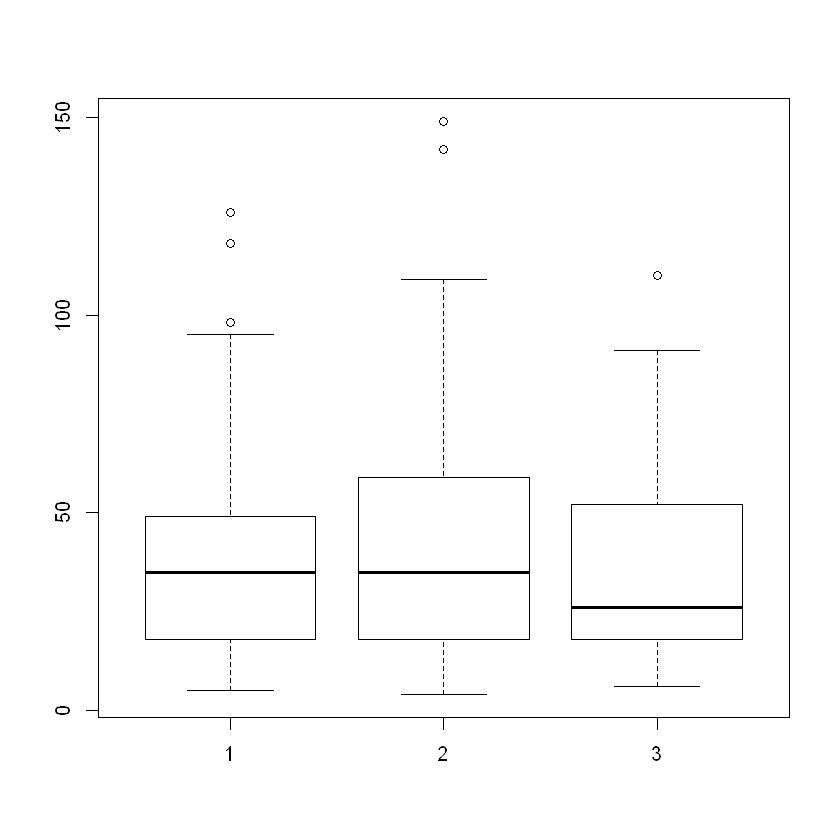

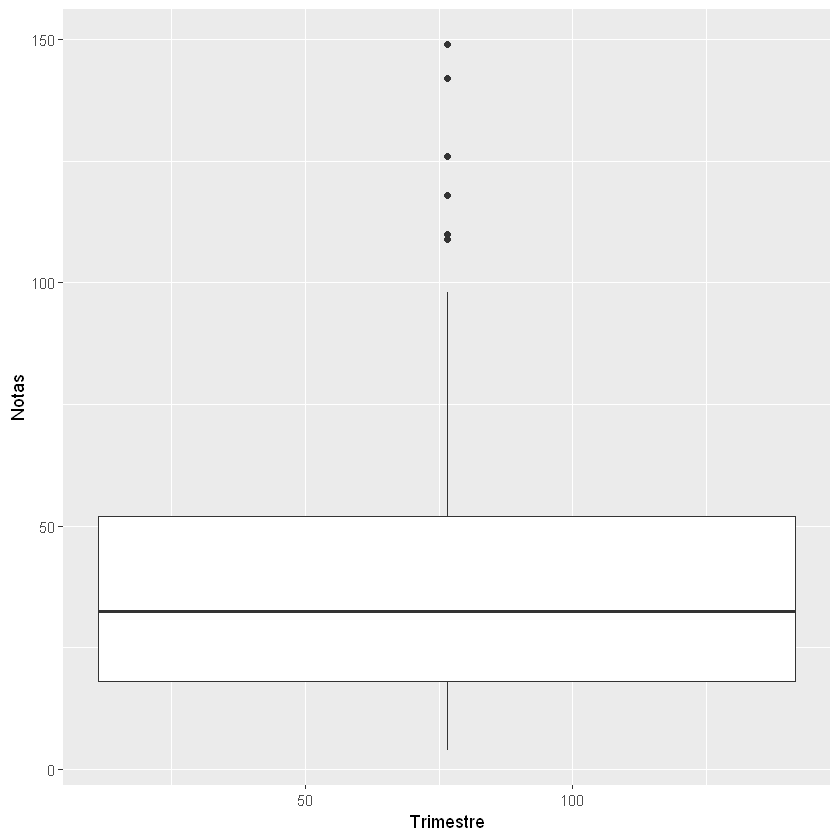

In [222]:
boxplot(Secundaria3_GUALEGUAY$Primero, Secundaria3_GUALEGUAY$Segundo, Secundaria3_GUALEGUAY$Tercero)


Secundaria3Trimestres_GUALEGUAY <- data.frame(
        Trimestre=c(Secundaria3_GUALEGUAY$Primero, Secundaria3_GUALEGUAY$Segundo, Secundaria3_GUALEGUAY$Tercero),
        Notas=c(as.numeric(Secundaria3_GUALEGUAY$Primero), as.numeric(Secundaria3_GUALEGUAY$Segundo), as.numeric(Secundaria3_GUALEGUAY$Tercero)))

g2 <- ggplot(Secundaria3Trimestres_GUALEGUAY, aes(Trimestre, Notas))
g2 + geom_boxplot(aes(fill = Trimestre))

---

## Guía 7 - Análisis Bivariado Cualitativo

1) Creo y modifico variables.  
a. Modifico la variable "resultado" para que contemple que para aprobar la materia, además de tener el promedio, se necesita aprobar el Tercer Trimestre con una nota mayor o igual a 6.

In [223]:
# Modifico variable "resultado" que depende de cuál caso se cumple en la variable "promedio"
GUALEGUAY_secundaria <- GUALEGUAY_secundaria %>% mutate(resultado = case_when(
    promedio >= 6 & notaTercerT >= 6 ~ "Aprobado",
    promedio < 6 | notaTercerT < 6 ~ "Rinde",
    TRUE ~ "Sin registro completo"))


ftable(GUALEGUAY_secundaria$resultado)

 Aprobado Rinde Sin registro completo
                                     
    22954 12281                   653

b. Creo la variable “desempeño”, esta variable clasifica las notas obtenidas.

In [224]:
# Creo variable "desempeño" que depende de cuál caso se cumple en la variable "promedio"
GUALEGUAY_secundaria <- GUALEGUAY_secundaria %>% mutate(desempenio = case_when(
    promedio < 4 ~ "Insuficiente",
    promedio >= 4 & promedio < 6 ~ "Regular",
    promedio >= 6 & promedio < 7 ~ "Aprobado",
    promedio >= 7 & promedio < 8 ~ "Bueno",
    promedio >= 8 & promedio < 9 ~ "Muy bueno",
    promedio >= 9 & promedio <= 10 ~ "Distinguido",
    TRUE ~ "Sin registro completo")
    )


ftable(GUALEGUAY_secundaria$desempenio)

 Aprobado Bueno Distinguido Insuficiente Muy bueno Regular Sin registro completo
                                                                                
     7360  7392        6564          276      8086    5483                   727

c. Creo la Variable “eximido”, esta variable mide si un estudiante no se llevó ninguna materia, se llevó entre 1 y 3 materias, se llevó más de tres materias.

In [225]:
# Creo variable "eximido"
GUALEGUAY_secundaria <- GUALEGUAY_secundaria %>% 
  group_by(documento) %>%
  mutate(asignaturasDesaprobadas = sum(str_detect(resultado, regex("Rinde", ignore_case = TRUE))))

GUALEGUAY_secundaria <- GUALEGUAY_secundaria %>% mutate(eximido = case_when(
  asignaturasDesaprobadas == 0 ~ "Eximido",
  asignaturasDesaprobadas >= 1 & asignaturasDesaprobadas <= 3 ~ "Parcialmente Eximido",
  asignaturasDesaprobadas >= 4  ~ "No Eximido",
  TRUE ~ "sin registro completo"
))

# Elimino la variable auxiliar "asignaturasDesaprobadas", ya que solamente la usamos para crear la variable "eximido"
GUALEGUAY_secundaria <- subset(GUALEGUAY_secundaria, select = -asignaturasDesaprobadas)

ftable(GUALEGUAY_secundaria$eximido)

 Eximido No Eximido Parcialmente Eximido
                                        
    6917      18648                10323

d. Creamos la variable "orientación" para expandir nuestro análisis.  
Esta variable determinará la orientación ideal del alumno para una carrera universitaria, en base a su mejor rendimiento en las materias troncales en los años cursados del nivel superior.

In [226]:
ftable(GUALEGUAY_secundaria$asignatura)

 BIOLOGIA EDUCACION FISICA FISICA FISICA Y QUIMICA GEOGRAFIA HISTORIA INGLES LENGUA MATEMATICA QUIMICA
                                                                                                      
     4560             5962    860             2040      5909     5729    243   3745       5898     942

Primero realizo un filtrado de asignaturas, donde creo dataframes de cada una, y luego realizo un promedio de sus notas.

In [227]:
# Creo un dataframe con las asignaturas deseadas para la orientación CS Naturales
CSNaturales_asignaturas <- c("BIOLOGIA", "FISICA", "FISICA Y QUIMICA", "QUIMICA")

GUALEGUAY_secundaria_CSNaturales <- filter(GUALEGUAY_secundaria, asignatura %in% CSNaturales_asignaturas)
print("DataFrame Orientación 'CS. Naturales'")
ftable(GUALEGUAY_secundaria_CSNaturales$asignatura)


# Creo un dataframe con las asignaturas deseadas para la orientación CS Sociales
CSSociales_asignaturas <- c("GEOGRAFIA", "HISTORIA")

GUALEGUAY_secundaria_CSSociales <- filter(GUALEGUAY_secundaria, asignatura %in% CSSociales_asignaturas)
print("DataFrame Orientación 'CS. Sociales'")
ftable(GUALEGUAY_secundaria_CSSociales$asignatura)


# Creo un dataframe con las asignaturas deseadas para la orientación Letras
Letras_asignaturas <- c("LENGUA")

GUALEGUAY_secundaria_Letras <- filter(GUALEGUAY_secundaria, asignatura %in% Letras_asignaturas)
print("DataFrame Orientación 'Letras'")
ftable(GUALEGUAY_secundaria_Letras$asignatura)


# Creo un dataframe con las asignaturas deseadas para la orientación Lenguas Extranjeras
LenguasExtranjeras_asignaturas <- c("INGLES")

GUALEGUAY_secundaria_LenguasExtranjeras <- filter(GUALEGUAY_secundaria, asignatura %in% LenguasExtranjeras_asignaturas)
print("DataFrame Orientación 'Lenguas Extranjeras'")
ftable(GUALEGUAY_secundaria_LenguasExtranjeras$asignatura)

[1] "DataFrame Orientación 'CS. Naturales'"


 BIOLOGIA FISICA FISICA Y QUIMICA QUIMICA
                                         
     4560    860             2040     942

[1] "DataFrame Orientación 'CS. Sociales'"


 GEOGRAFIA HISTORIA
                   
      5909     5729

[1] "DataFrame Orientación 'Letras'"


 LENGUA
       
   3745

[1] "DataFrame Orientación 'Lenguas Extranjeras'"


 INGLES
       
    243

Creo las medidas de resumen de cada orientación, para luego determinar cuál sería la ideal para el alumno.

In [228]:
# Calculo los valores de CS Naturales
GUALEGUAY_secundaria_CSNaturales_medidas <- 
    data.frame(
        orientacion="CS NATURALES",
        media=round(mean(GUALEGUAY_secundaria_CSNaturales$promedio, na.rm = TRUE), 2),
        varianza=round(var(GUALEGUAY_secundaria_CSNaturales$promedio, na.rm = TRUE), 2),
        desvio=round(sd(GUALEGUAY_secundaria_CSNaturales$promedio, na.rm = TRUE), 2),
        Minimo=min(GUALEGUAY_secundaria_CSNaturales$promedio, na.rm = TRUE),
        Maximo=max(GUALEGUAY_secundaria_CSNaturales$promedio, na.rm = TRUE)
    )


# Calculo los valores de CS Sociales
GUALEGUAY_secundaria_CSSociales_medidas <- 
    data.frame(
        orientacion="CS SOCIALES",
        media=round(mean(GUALEGUAY_secundaria_CSSociales$promedio, na.rm = TRUE), 2),
        varianza=round(var(GUALEGUAY_secundaria_CSSociales$promedio, na.rm = TRUE), 2),
        desvio=round(sd(GUALEGUAY_secundaria_CSSociales$promedio, na.rm = TRUE), 2),
        Minimo=min(GUALEGUAY_secundaria_CSSociales$promedio, na.rm = TRUE),
        Maximo=max(GUALEGUAY_secundaria_CSSociales$promedio, na.rm = TRUE)
    )


# Calculo los valores de Letras
GUALEGUAY_secundaria_Letras_medidas <- 
    data.frame(
        orientacion="LETRAS",
        media=round(mean(GUALEGUAY_secundaria_Letras$promedio, na.rm = TRUE), 2),
        varianza=round(var(GUALEGUAY_secundaria_Letras$promedio, na.rm = TRUE), 2),
        desvio=round(sd(GUALEGUAY_secundaria_Letras$promedio, na.rm = TRUE), 2),
        Minimo=min(GUALEGUAY_secundaria_Letras$promedio, na.rm = TRUE),
        Maximo=max(GUALEGUAY_secundaria_Letras$promedio, na.rm = TRUE)
    )


# Calculo los valores de Lenguas Extranjeras
GUALEGUAY_secundaria_LenguasExtranjeras_medidas <- 
    data.frame(
        orientacion="LENGUAS EXTRANJERAS",
        media=round(mean(GUALEGUAY_secundaria_LenguasExtranjeras$promedio, na.rm = TRUE), 2),
        varianza=round(var(GUALEGUAY_secundaria_LenguasExtranjeras$promedio, na.rm = TRUE), 2),
        desvio=round(sd(GUALEGUAY_secundaria_LenguasExtranjeras$promedio, na.rm = TRUE), 2),
        Minimo=min(GUALEGUAY_secundaria_LenguasExtranjeras$promedio, na.rm = TRUE),
        Maximo=max(GUALEGUAY_secundaria_LenguasExtranjeras$promedio, na.rm = TRUE)
    )

Agrupo los DataFrames de cada orientación en uno solo, y muestro sus valores de Medida.  
Con esto analizamos cuál es la orientación ideal del alumno, en base a sus mejores promedios.

In [229]:
# Combino los dataframes en uno solo
GUALEGUAY_secundaria_OrientacionesYPromedios <- rbind(
  GUALEGUAY_secundaria_CSNaturales_medidas,
  GUALEGUAY_secundaria_CSSociales_medidas,
  GUALEGUAY_secundaria_Letras_medidas,
  GUALEGUAY_secundaria_LenguasExtranjeras_medidas
)
print("Promedios de los alumnos de Gualeguay en cada Orientación ")
head(GUALEGUAY_secundaria_OrientacionesYPromedios)

[1] "Promedios de los alumnos de Gualeguay en cada Orientación "


orientacion,media,varianza,desvio,Minimo,Maximo
CS NATURALES,7.08,2.33,1.53,2.00,10
CS SOCIALES,7.42,2.11,1.45,2.00,10
LETRAS,7.03,2.18,1.48,2.33,10
LENGUAS EXTRANJERAS,6.96,2.69,1.64,4.00,10


Luego de todo este análisis, agregamos la variable "orientacionRecomendada", al DataFrame principal.  
Para crear esta variable, primero creamos una variable para cada promedio de las orientaciones.

In [233]:
# Guardo el promedio de cada orientación por alumno
GUALEGUAY_secundaria <- GUALEGUAY_secundaria %>% 
  group_by(documento) %>%
    mutate(
      promedioCSNaturales = round(mean(promedio[asignatura %in% CSNaturales_asignaturas], na.rm = TRUE), 2),
      promedioCSSociales = round(mean(promedio[asignatura %in% CSSociales_asignaturas], na.rm = TRUE), 2),
      promedioLetras = round(mean(promedio[asignatura %in% Letras_asignaturas], na.rm = TRUE), 2),
      promedioLenguasExtranjeras = round(mean(promedio[asignatura %in% LenguasExtranjeras_asignaturas], na.rm = TRUE), 2)
    )

# Si el valor es "NaN", le asigno un 0
GUALEGUAY_secundaria <- GUALEGUAY_secundaria %>%
  group_by(documento) %>%
  mutate(
    promedioCSNaturales = round(ifelse(is.nan(promedioCSNaturales), 0, promedioCSNaturales), 2),
    promedioCSSociales = round(ifelse(is.nan(promedioCSSociales), 0, promedioCSSociales), 2),
    promedioLetras = round(ifelse(is.nan(promedioLetras), 0, promedioLetras), 2),
    promedioLenguasExtranjeras = round(ifelse(is.nan(promedioLenguasExtranjeras), 0, promedioLenguasExtranjeras), 2)
  )


head(GUALEGUAY_secundaria, 5)

# Compruebo que sean valores distintos los promedios para cada alumno
print("Promedio 'CS Naturales'")
ftable(GUALEGUAY_secundaria$promedioCSNaturales)

print("Promedio 'CS Sociales'")
ftable(GUALEGUAY_secundaria$promedioCSSociales)

print("Promedio 'Letras'")
ftable(GUALEGUAY_secundaria$promedioLetras)

print("Promedio 'Lenguas Extranjeras'")
ftable(GUALEGUAY_secundaria$promedioLenguasExtranjeras)

CUE,departamento,localidad,codigoPostal,anioLectivo,esPrivada,esMultianio,nivelEnsenanza,modEnsenanza,anioCursado,...,notaTercerT,promedio,resultado,desempenio,eximido,promedioCSNaturales,promedioCSSociales,promedioLetras,promedioLenguasExtranjeras,orientacionRecomendada
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,PRIMERO,...,9,9.00,Aprobado,Distinguido,Eximido,0.00,0.00,9.00,0,No definida
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,9,8.00,Aprobado,Muy bueno,Parcialmente Eximido,5.89,6.83,8.33,0,No definida
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,8,8.67,Aprobado,Muy bueno,Parcialmente Eximido,5.89,6.83,8.33,0,No definida
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,3,3.67,Rinde,Insuficiente,Parcialmente Eximido,5.89,6.83,8.33,0,No definida
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,5,5.33,Rinde,Regular,Parcialmente Eximido,5.89,6.83,8.33,0,No definida


[1] "Promedio 'CS Naturales'"


    0    2    3 3.34 3.42  3.5 3.66 3.67 3.83 3.84    4 4.17 4.22 4.33 4.34 4.39 4.44  4.5 4.55 4.56 4.58 4.61 4.66 4.67 4.72 4.78 4.83 4.84 4.89 4.92    5 5.06 5.11 5.17 5.22 5.24 5.25 5.28 5.33 5.34 5.36 5.39 5.41 5.42 5.43 5.44 5.45 5.48 5.49  5.5 5.55 5.56 5.58 5.61 5.66 5.67 5.72 5.75 5.78 5.83 5.84 5.85 5.89 5.92 5.94 5.98    6 6.05 6.06 6.11 6.15 6.17 6.18 6.21 6.22 6.24 6.26 6.27 6.28  6.3 6.33 6.34 6.36 6.37 6.39  6.4 6.42 6.44 6.45 6.49  6.5 6.52 6.55 6.56 6.61 6.66 6.67  6.7 6.72 6.73 6.78 6.79 6.82 6.83 6.84 6.85 6.89 6.91 6.92 6.95    7 7.03 7.05 7.06 7.08 7.09  7.1 7.11 7.17  7.2 7.21 7.22 7.24 7.27 7.28  7.3 7.33 7.34 7.39 7.42 7.44 7.45 7.48 7.49  7.5 7.52 7.53 7.55 7.56 7.57 7.58 7.61 7.64 7.66 7.67 7.69 7.72 7.74 7.78 7.79 7.82 7.83 7.84 7.89 7.91 7.92 7.94 7.95 7.96    8 8.03 8.05 8.06 8.09 8.11 8.16 8.17 8.18 8.21 8.22 8.24 8.27 8.28 8.33 8.34 8.36 8.42 8.44 8.45 8.48  8.5 8.51 8.54 8.55 8.56 8.58 8.66 8.67  8.7 8.72 8.73 8.76 8.78 8.79 8.82 8.83 8.84 8.85 8.89 8.91

[1] "Promedio 'CS Sociales'"


    0    2 2.33 2.66 2.67    3 3.17 3.22 3.28 3.33  3.5 3.66 3.67 3.75    4 4.08 4.17 4.33 4.34  4.5 4.58 4.66 4.67 4.72 4.83 4.84 4.92 4.96    5 5.08 5.17 5.25 5.33 5.34 5.42  5.5 5.51 5.57 5.58 5.59  5.6 5.66 5.67 5.72 5.73 5.75 5.79  5.8 5.83 5.84 5.89 5.92 5.93 5.94 5.95    6 6.08 6.11 6.13 6.17 6.18  6.2 6.22 6.25 6.28 6.31 6.33 6.34 6.39 6.42 6.44 6.45  6.5 6.51 6.53 6.54 6.55 6.56 6.58  6.6 6.61 6.62 6.66 6.67 6.69 6.72 6.75 6.78 6.79  6.8 6.82 6.83 6.84 6.89 6.92 6.94    7 7.06 7.08 7.11 7.17 7.22 7.23 7.25 7.27 7.28  7.3 7.33 7.34 7.41 7.42 7.44 7.45  7.5 7.53 7.55 7.56 7.58 7.61 7.64 7.66 7.67 7.72 7.73 7.75 7.78 7.79  7.8 7.81 7.83 7.84 7.87 7.89 7.92 7.94 7.95    8 8.03 8.06 8.08 8.11 8.12 8.13 8.16 8.17 8.21 8.22 8.25 8.26 8.27 8.28 8.29 8.31 8.33 8.34 8.36 8.37 8.38 8.39 8.42 8.44 8.45 8.47  8.5 8.53 8.55 8.56 8.58 8.59 8.61 8.66 8.67 8.69 8.72 8.73 8.75 8.78 8.79  8.8 8.83 8.84 8.87 8.89 8.92 8.94 8.95    9 9.04 9.06 9.07 9.08 9.09 9.11 9.12 9.14 9.16 9.17  9.2 9.22 9.25

[1] "Promedio 'Letras'"


    0    3 3.33 3.34  3.5 3.67 3.84    4 4.11 4.22 4.33  4.5 4.66 4.67 4.83 4.84    5 5.17 5.22 5.33 5.34  5.5 5.66 5.67 5.72 5.78 5.83 5.84 5.89 5.92    6 6.17 6.22 6.33 6.44  6.5 6.66 6.67 6.78 6.83 6.84    7 7.17 7.33 7.34  7.5 7.67 7.83 7.84 7.89    8 8.16 8.33 8.34 8.44  8.5 8.66 8.67 8.84    9 9.16 9.33 9.34  9.5 9.67   10
                                                                                                                                                                                                                                                                                                                                          
 1754   15   98   28   28   51   28  190  126  126  204    9   13  541   59   33  982  203  119 1217   42  107   26 1363   42   56   26   68   63  206 2893   83   53 2126   63  215   50 2368  119   71   79 2431  120 2078   26  182 2002   52   71   56 2367   80 2398   26   56  104   26 2377  109 2367   83 1392    5   98 1171  268

[1] "Promedio 'Lenguas Extranjeras'"


     0     4  4.17  4.33  4.67     5  5.17  5.33  5.67     6  6.17  6.33  6.66  6.67     7  7.33  7.67     8  8.33  8.67     9  9.33  9.67    10
                                                                                                                                                
 33983    42     7    17    50   114    81    95    77   204    13   116    13    85   102   109   131   182    52   114   112    17    82    90

Comprobamos cuál es el promedio mas alto del alumno, y guardamos la orientación en la que se destacó, dentro de la variable "orientacionRecomendada"

In [237]:
# Creo varialbe "orientacionRecomendada"
GUALEGUAY_secundaria <- GUALEGUAY_secundaria %>% 
  group_by(documento) %>%
    mutate(
      orientacionRecomendada = case_when(
        promedioCSNaturales >= max(promedioCSNaturales, promedioCSSociales, promedioLetras, promedioLenguasExtranjeras) ~ "CS NATURALES",
        promedioCSSociales >= max(promedioCSNaturales, promedioCSSociales, promedioLetras, promedioLenguasExtranjeras) ~ "CS SOCIALES",
        promedioLetras >= max(promedioCSNaturales, promedioCSSociales, promedioLetras, promedioLenguasExtranjeras) ~ "LETRAS",
        promedioLenguasExtranjeras >= max(promedioCSNaturales, promedioCSSociales, promedioLetras, promedioLenguasExtranjeras) ~ "LENGUAS EXTRANJERAS",
        TRUE ~ "No definida"
      )
    )


# Elimino variables auxiliares de los promedios, ya que solamente las usamos para crear la variable "eximorientacionRecomendadaido"
GUALEGUAY_secundaria <- select(GUALEGUAY_secundaria, -promedioCSNaturales, -promedioCSSociales, -promedioLetras, -promedioLenguasExtranjeras)


head(GUALEGUAY_secundaria)
ftable(GUALEGUAY_secundaria$orientacionRecomendada)

CUE,departamento,localidad,codigoPostal,anioLectivo,esPrivada,esMultianio,nivelEnsenanza,modEnsenanza,anioCursado,...,documento,asignatura,notaPrimerT,notaSegundoT,notaTercerT,promedio,resultado,desempenio,eximido,orientacionRecomendada
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,PRIMERO,...,50072015,LENGUA,9,9,9,9.00,Aprobado,Distinguido,Eximido,LETRAS
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,47526536,BIOLOGIA,7,8,9,8.00,Aprobado,Muy bueno,Parcialmente Eximido,LETRAS
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,47526536,EDUCACION FISICA,9,9,8,8.67,Aprobado,Muy bueno,Parcialmente Eximido,LETRAS
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,47526536,FISICA,4,4,3,3.67,Rinde,Insuficiente,Parcialmente Eximido,LETRAS
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,47526536,GEOGRAFIA,6,5,5,5.33,Rinde,Regular,Parcialmente Eximido,LETRAS
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,47526536,HISTORIA,9,7,9,8.33,Aprobado,Muy bueno,Parcialmente Eximido,LETRAS


 CS NATURALES CS SOCIALES LENGUAS EXTRANJERAS LETRAS
                                                    
         9389       14938                 285  11276

---

Estado actual del dataset con las variables nuevas creadas.  
Variables modificadas:  
    . resultado  
  
Variables nuevas:  
    . desempenio  
    . eximido  
    . orientacionRecomendada

In [232]:
# Visualización de "GUALEGUAY_secundaria"
names(GUALEGUAY_secundaria)
dim(GUALEGUAY_secundaria)
head(GUALEGUAY_secundaria, 2)

[1] "CUE"                        "departamento"              
 [3] "localidad"                  "codigoPostal"              
 [5] "anioLectivo"                "esPrivada"                 
 [7] "esMultianio"                "nivelEnsenanza"            
 [9] "modEnsenanza"               "anioCursado"               
[11] "turno"                      "idAlumno"                  
[13] "documento"                  "asignatura"                
[15] "notaPrimerT"                "notaSegundoT"              
[17] "notaTercerT"                "promedio"                  
[19] "resultado"                  "desempenio"                
[21] "eximido"                    "promedioCSNaturales"       
[23] "promedioCSSociales"         "promedioLetras"            
[25] "promedioLenguasExtranjeras" "orientacionRecomendada"

[1] 35888    26

CUE,departamento,localidad,codigoPostal,anioLectivo,esPrivada,esMultianio,nivelEnsenanza,modEnsenanza,anioCursado,...,notaTercerT,promedio,resultado,desempenio,eximido,promedioCSNaturales,promedioCSSociales,promedioLetras,promedioLenguasExtranjeras,orientacionRecomendada
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,PRIMERO,...,9,9,Aprobado,Distinguido,Eximido,NaN,NaN,9.00,NaN,No definida
6005352,GUALEGUAY,GUALEGUAY,3190,2022,N,N,SECUNDARIO,Comun,CUARTO,...,9,8,Aprobado,Muy bueno,Parcialmente Eximido,5.89,6.83,8.33,NaN,No definida


---

## Guía 8